In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('C:/Users/1234/Desktop/New folder/K-NEarest-Neighbor-master/Classified Data',index_col=0)

In [9]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [21]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [25]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [26]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [27]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [28]:
#train test split

In [29]:
from sklearn.model_selection import train_test_split

In [41]:
X_test,X_train,Y_test,Y_train = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [42]:
#USING KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn=KNeighborsClassifier(n_neighbors=1)

In [45]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
pred=knn.predict(X_test)


In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(Y_test,pred))

[[304  43]
 [ 35 318]]


In [51]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       347
           1       0.88      0.90      0.89       353

    accuracy                           0.89       700
   macro avg       0.89      0.89      0.89       700
weighted avg       0.89      0.89      0.89       700



In [52]:
#To find the K value

In [54]:
error_rate =[]

for i in range(1,40):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred=knn.predict(X_test)
    error_rate.append(np.mean(pred!=Y_test))
    

Text(0, 0.5, 'Error Rate')

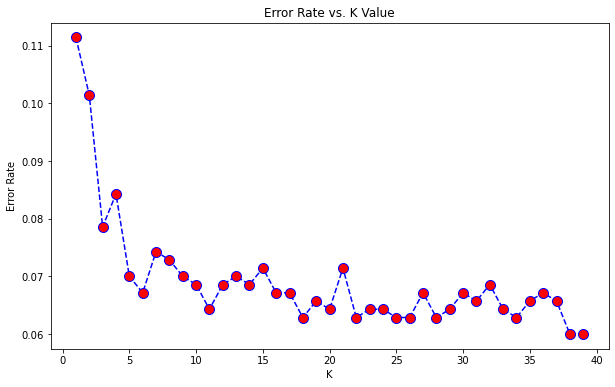

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [56]:
#with K=23

knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)


In [57]:
from sklearn.metrics import classification_report,confusion_matrix


In [58]:
print(confusion_matrix(Y_test,pred))

[[320  27]
 [ 18 335]]


In [59]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       347
           1       0.93      0.95      0.94       353

    accuracy                           0.94       700
   macro avg       0.94      0.94      0.94       700
weighted avg       0.94      0.94      0.94       700

